In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 

We will construct a MCMC sampler to conduct Bayesian regression. Let us first generate a dataset. 

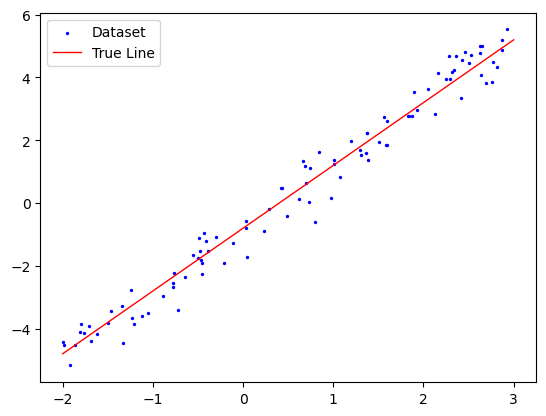

In [12]:
N = 100
X = np.random.uniform(-2, 3, N) 
Y = 2.0 * X - 0.8 + np.random.normal(0, 0.5, N) 

plt.scatter(X, Y, c="b", s=2, label="Dataset") 
x_ran = np.linspace(-2, 3, 1000)
y_ran = 2.0 * x_ran - 0.8 
plt.plot(x_ran, y_ran, c="r", linewidth=1, label="True Line")
plt.legend() 
plt.show() 

Now, let's define our loss function. 

In [17]:
def loss(tup): 
    return - np.sum(np.square(Y - tup[0] * X + tup[1]))

Now make our markov chain

In [21]:
steps = []

now = np.zeros(2) 

for _ in range(100000): 
    step = np.random.normal(0, 1, 2) 
    potential = now + step 
    
    if loss(potential) > loss(now): 
        now = potential 
    else: 
        unf = np.random.uniform(0, 1) 
        if unf < loss(potential)/loss(now): 
            now = potential 
        else: 
            pass 
    
    steps.append(now) 


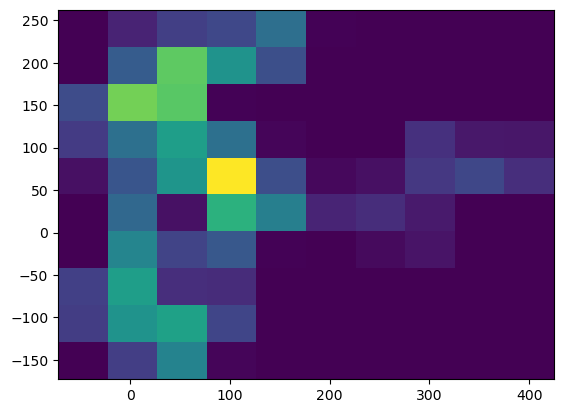

In [22]:
Ms = [x[0] for x in steps] 
Bs = [x[1] for x in steps] 
plt.hist2d(Ms, Bs) 
plt.show() 

(array([ 5543., 26194., 28352., 22880.,  8804.,   852.,  1311.,  2874.,
         1883.,  1307.]),
 array([-72.36305673, -22.65131155,  27.06043364,  76.77217882,
        126.483924  , 176.19566919, 225.90741437, 275.61915956,
        325.33090474, 375.04264992, 424.75439511]),
 <BarContainer object of 10 artists>)

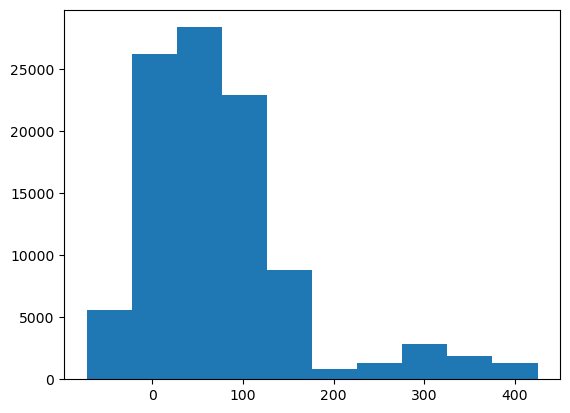

In [23]:
plt.hist(Ms)